In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("/kaggle/input/signaldataset/combined_uwb_dataset.csv")

# Features and labels
X = df.drop("NLOS", axis=1)
y = df["NLOS"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

# Store accuracies
train_accuracies = {}
test_accuracies = {}

# Training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test, test_preds))






Training Logistic Regression...
Train Accuracy: 0.8727
Test Accuracy: 0.8592
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4187
         1.0       0.89      0.82      0.85      4213

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400


Training Random Forest...
Train Accuracy: 1.0000
Test Accuracy: 0.8786
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      4187
         1.0       0.92      0.83      0.87      4213

    accuracy                           0.88      8400
   macro avg       0.88      0.88      0.88      8400
weighted avg       0.88      0.88      0.88      8400


Training KNN...
Train Accuracy: 0.7441
Test Accuracy: 0.6508
              precision    recall  f1-score   support

         0.0       0.60      0.93      0.73      4187
         1.0       0.85  

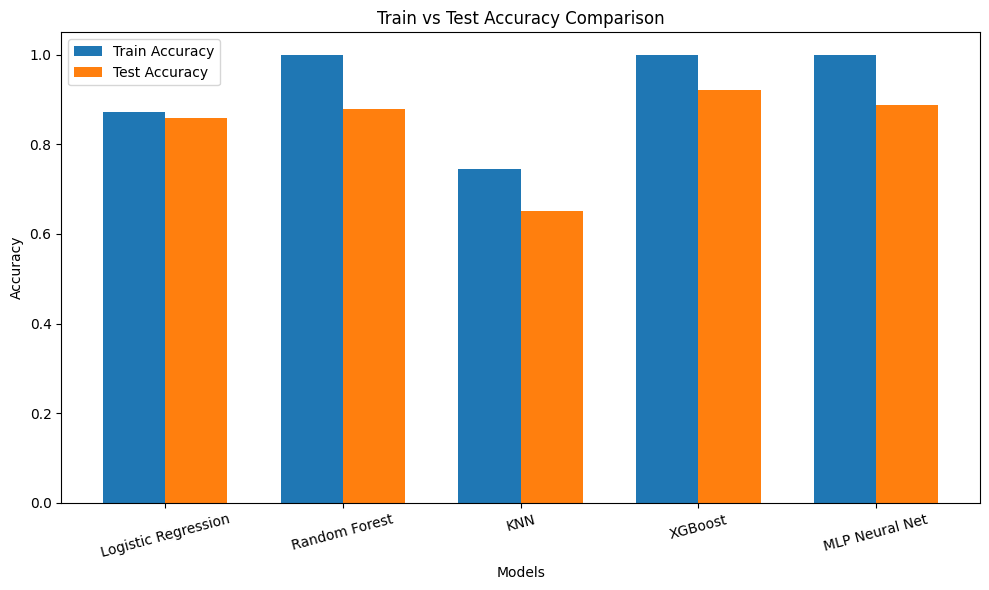

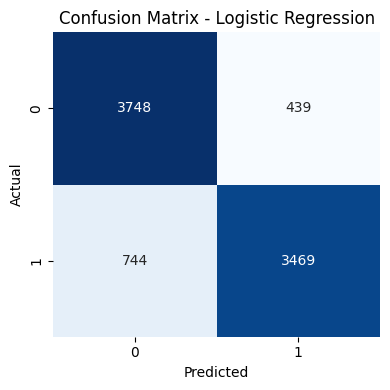

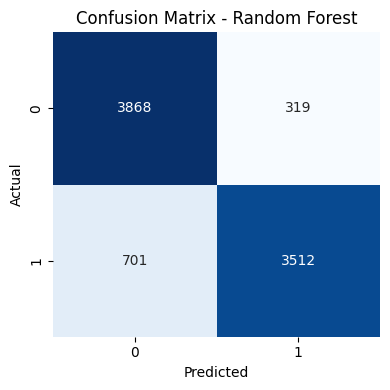

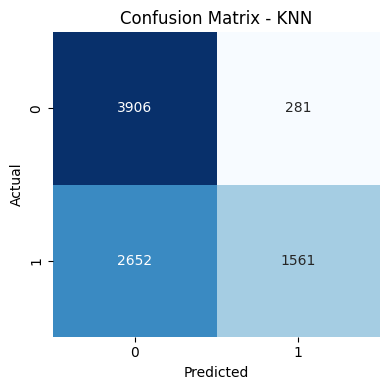

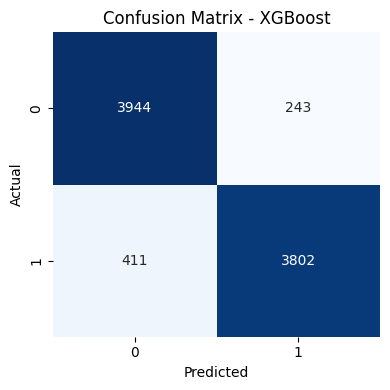

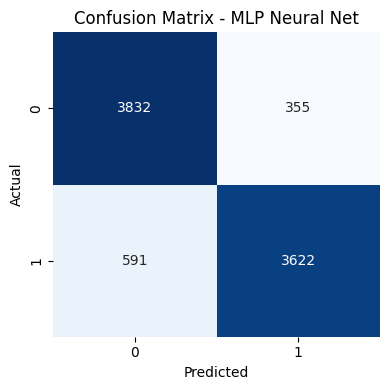

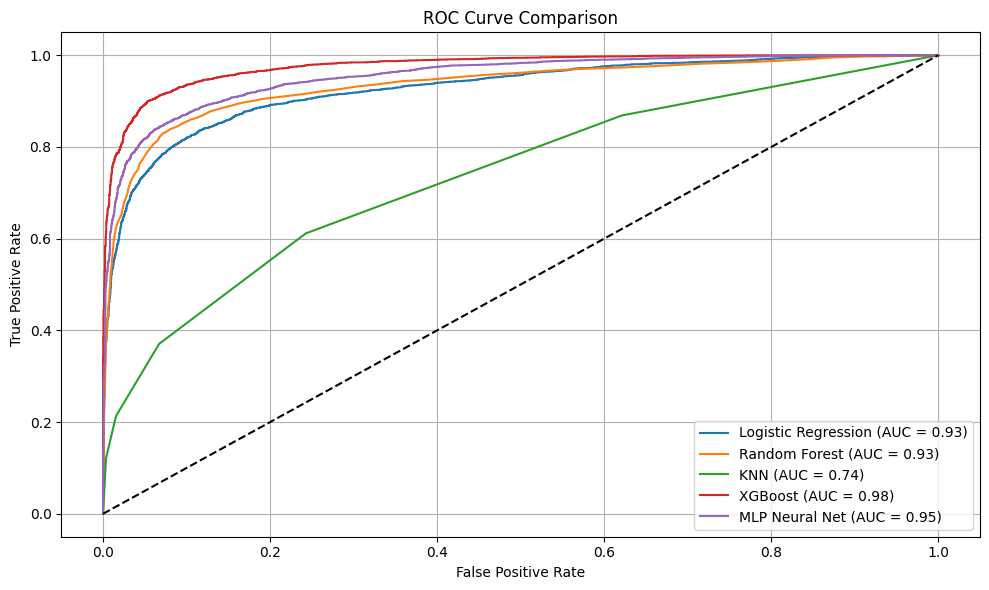

In [2]:


import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, list(train_accuracies.values()), bar_width, label='Train Accuracy')
plt.bar(index + bar_width, list(test_accuracies.values()), bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy Comparison')
plt.xticks(index + bar_width / 2, list(models.keys()), rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        try:
            y_score = model.decision_function(X_test)
        except:
            continue  # Skip model if no score method

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
